<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1**
Joshua Dollison

MAT421-16133

1/19/2025


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math

# **9.1: Base-N and Binary**

The course textbook points out that mathematics has infinite precision when describing numbers, but this presents a significant problem for computers, since they only have a limited amount of space to store numbers, and they cannot understand abstract notations of representing numbers more compactly.

This section focuses on how numbers are represented in various bases, such as binary (base-2) and decimal (base-10). It explains the significance of these systems in computing and how conversions between different bases are performed.

Below, I present several examples demonstrating some of the topics that were discussed.  In the first, I simply demonstrate the inherent capabilities of Python to display numbers across several representations and perform mathematical operations.


In [2]:
# Example 1: Conversion to Binary, Octal, and Hexadecimal
number = 42
print(f"Decimal: {number}")
print(f"Binary: {bin(number)}")
print(f"Octal: {oct(number)}")
print(f"Hexadecimal: {hex(number)}")

binary_number = "101010"
decimal_number = int(binary_number, 2)
print(f"Binary: {binary_number} -> Decimal: {decimal_number}")

# addition
binary_number = bin(number + number)
decimal_number = int(binary_number, 2)
print(f"Binary: {binary_number} -> Decimal: {decimal_number}")


# multiplication
binary_number = bin(number * number)
decimal_number = int(binary_number, 2)
print(f"Binary: {binary_number} -> Decimal: {decimal_number}")

Decimal: 42
Binary: 0b101010
Octal: 0o52
Hexadecimal: 0x2a
Binary: 101010 -> Decimal: 42
Binary: 0b1010100 -> Decimal: 84
Binary: 0b11011100100 -> Decimal: 1764


As we see in the first example, because binary representations are restricted to combinations of two digits (0, 1), larger numbers require a more verbose representation.  In this Chat-GPT inspired example, we compare the number of digits required to represent increasing decimal values.  We can see that by the time we get to 32, we need 6 digits to represent what takes only 2 digits in base-10.

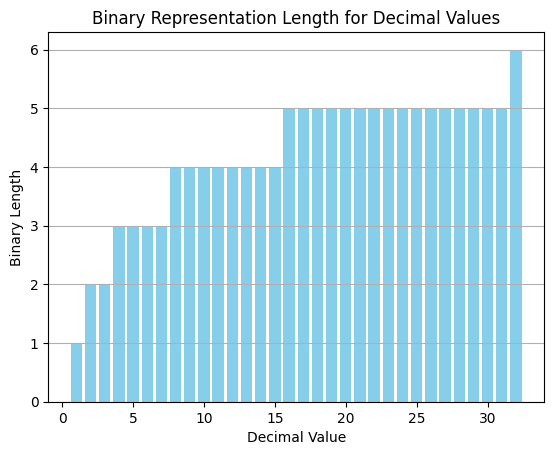

In [3]:
values = np.arange(1, 33)
binary_lengths = [len(bin(v)[2:]) for v in values]

plt.bar(values, binary_lengths, color='skyblue')
plt.xlabel('Decimal Value')
plt.ylabel('Binary Length')
plt.title('Binary Representation Length for Decimal Values')
plt.grid(axis='y')
plt.show()

# **9.2: Floating Point Numbers**

The course textbook states that a pure binary representation is unsuitable for a few reasons.  First, it restricts the set of of available numbers to integers and, secondly, the previously described verbosity is a limiting factor.  A 32 bit representation, the book states, is limited to 4,294,967,296 numbers.

According to the text, o achieve the range of values needed with the same number of bits, we use floating point numbers or float for short. Instead of utilizing each bit as the coefficient of a power of 2, floats allocate bits to three different parts: the sign indicator, $s$, which says whether a number is positive or negative; characteristic or exponent, $e$, which is the power of 2; and the fraction, $f$, which is the coefficient of the exponent. Almost all platforms map Python floats to the IEEE754 double precision - 64 total bits. 1 bit is allocated to the sign indicator, 11 bits are allocated to the exponent, and 52 bits are allocated to the fraction. While the introduction of this data type increases the range and precision of numeric representations considerable, it still can't fully represent the infinite, uncountable set of real numbers.

The examples below showcase floating-point representation precision, demonstrate gaps between consecutive numbers, and visualize the implications of these gaps in numerical calculations.  The Chat-GPT inspired charting exercise shows how much variance can occur when viewing a discrete number of intervals (200) between 1 and 2.  As you can see, there are multiple intervals in this small sample which are not represented with absolute precision.  This variance increases as the value of the number increases.  This behavior is a fundamental trade-off in floating-point arithmetic. It ensures a wide range of values can be represented but at the cost of precision for larger numbers.

Exact Value: 0.3333333333333333
Floating-Point Representation (17 digits): 0.33333333333333331


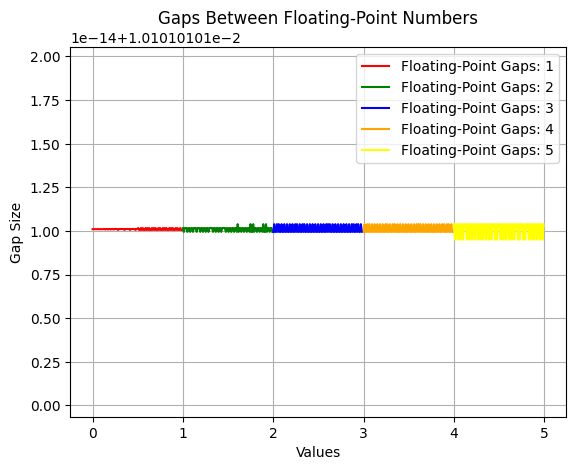

In [4]:
# infinitely repeating decimal
number = 1 / 3
print(f"Exact Value: {number}")
print(f"Floating-Point Representation (17 digits): {number:.17f}")


#
colors = ['red', 'green', 'blue', 'orange', 'yellow']
for n in range(5):
  #print(colors[n-1])

  values = np.linspace(n, n+1, 100)
  gaps = np.diff(values)

  plt.plot(values[:-1], gaps, label=f'Floating-Point Gaps: {n + 1}', c=colors[n])



plt.xlabel('Values')
plt.ylabel('Gap Size')
plt.title('Gaps Between Floating-Point Numbers')
plt.legend()
plt.grid()
plt.show()


# **9.3: Round-off Errors**

The course text states that because floating point numbers are represented in computers as base 2 fractions, a side effect is created in which the floating point numbers can not be stored with perfect precision, instead the numbers are approximated by finite number of bytes. Therefore, the difference between an approximation of a number used in computation and its correct (true) value is called round-off error. It is one of the common errors usually in the numerical calculations.

The text goes on to review specific round-off error topics including representation error, round-off error induced by floating-point arithmetic, and accumulation of round-off errors.  I include several examples below including:  comparing exact differences versus approximations, highlighting cumulative errors in summation, and a Chat-GPT inspired visualization of round-off errors in square root calculations.

Round-Off Error in Subtraction
Exact Difference: 1.0000000005838672e-07
Approximated Difference: 1.0000000005838672e-07

Cumulative Round-Off Error
Sum with Round-Off: 100.00000000000001
Exact Sum: 100.0
Error: -1.4210854715202004e-14



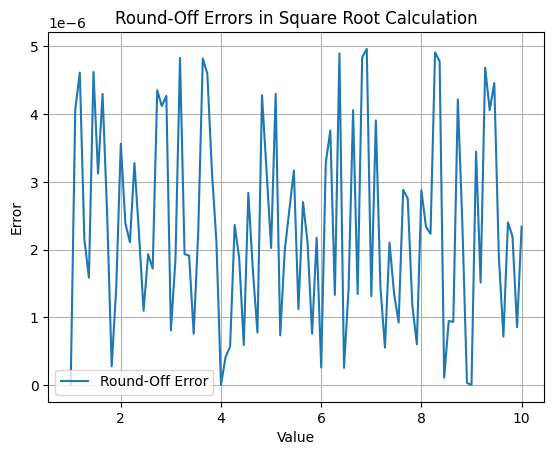

In [5]:
# Example 1
x = 1.0000001
y = 1.0
exact_diff = x - y
approx_diff = round(x, 7) - round(y, 7)
print("Round-Off Error in Subtraction")
print(f"Exact Difference: {exact_diff}")
print(f"Approximated Difference: {approx_diff}")

# Example 2
values = np.full(1000, 0.1)
sum_values = np.sum(values)
exact_sum = 100.0
error = exact_sum - sum_values
print("\nCumulative Round-Off Error")
print(f"Sum with Round-Off: {sum_values}")
print(f"Exact Sum: {exact_sum}")
print(f"Error: {error}\n")

# Example 3
values = np.linspace(1, 10, 100)
true_values = np.sqrt(values)
approx_values = np.array([round(v, 5) for v in true_values])
errors = np.abs(true_values - approx_values)

plt.plot(values, errors, label='Round-Off Error')
plt.xlabel('Value')
plt.ylabel('Error')
plt.title('Round-Off Errors in Square Root Calculation')
plt.legend()
plt.grid()
plt.show()